In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
%matplotlib inline
#Autor: Enzo Gaggioli, e.l.gaggioli@gmail.com. IFIBA-CONICET-UBA

#Creo un "key" para que global lea los archivos de forma ordenada
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts


zmin=0
zmax=260
rnge=zmax-zmin
print('range=',rnge,'micrómetros') #Este es el rango que recorrió el microscopio con los stacks.

directorio='cinta_2_zstack_b.tif.frames' #El directorio donde voy a leer los tifs.

i=0
for filename in glob('/home/enzo/Desktop/Confocal/'+directorio+'/*.tif'):
    i=i+1 #Contamos los tifs para saber cuantos stacks hay en el rango total
          #y definir un dz.
        
dz=(rnge/(i-1))
print('dz=',dz,'micrómetros','en ',i,'stacks')

z_val = []
num_fig=i #Numero total de figuras tif.
for j in range(0,num_fig):
    t = j*dz #Paso z(i), con z(i+1)-z(i)=dz (grilla uniforme)
    z_val.append(t) #Guardo los valores de z(i).

z_val = np.asarray(z_val)  
    
int_val = [] #Valores de intensidad.
int_err = [] #Valores del error (desviación estandar).

#Abrimos cada figura. El key es el que definí arriba, y los va a leer de forma ordenada numéricamente.
for filename in sorted(glob('/home/enzo/Desktop/Confocal/'+directorio+'/*.tif'), key=numericalSort):
#    print(filename) #esto es para probar que lea ordenado.
    im = Image.open(filename) #Abro la imagen.
    imarray = np.array(im)    #Convierto la imagen en un array.
    t=np.mean(imarray)        #El valor medio del array (valor de intensidad).
    dt=np.std(imarray)        #La desviación estandar del array (margen de error de la intensidad).
    int_val.append(t)         #Guardo el valor medio en el vector int_val.
    int_err.append(dt)        #Guardo la desviación estándar en el array int_err.
    
    
    
int_val = np.asarray(int_val) 
int_err = np.asarray(int_err) 

range= 260
dz= 2.9885057471264367 micrometros en  88 stacks


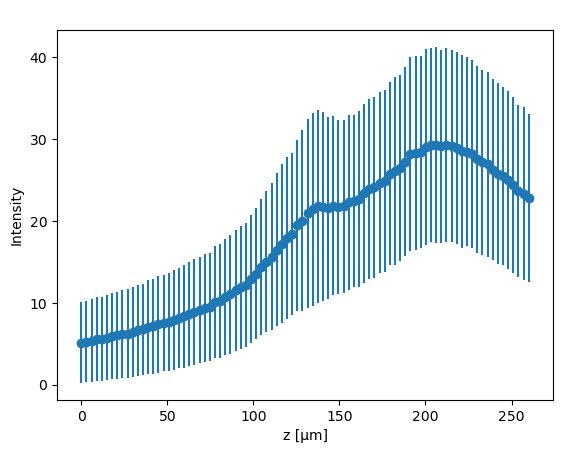

In [5]:
 fig, ax = plt.subplots()


ax.errorbar(z_val, int_val,
            xerr=1, #Tomo el error en z como 1um.
            yerr=int_err, #El error en la intensidad es la desviación estándar.
            fmt='o')


ax.set_xlabel('z [\u03BCm]')
ax.set_ylabel('Intensity')
ax.set_title('   ')


#plt.show()
plt.savefig(directorio+'.eps')

In [6]:
int_err.size

88